### reference
https://cookbook.openai.com/examples/recommendation_using_embeddings

In [36]:
from dotenv import dotenv_values
from openai import OpenAI
import json

envs = dotenv_values("../.env")
openai = OpenAI(api_key = envs["OPENAI_API_KEY"])

### cosine_similarity

In [37]:
from scipy.spatial.distance import cosine
def cosine_similarity(a, b):
    return 1 - cosine(a, b)

### get_embedding

In [38]:
import tiktoken
def get_embedding(text, encoding = "cl100k_base", model = "text-embedding-3-small"):
    encoding = tiktoken.get_encoding(encoding)  
    return openai.embeddings.create(input = encoding.encode(text), model = model).data[0].embedding

### distances_from_embeddings

In [39]:
from typing import List
import numpy as np

def indices_of_nearest_neighbors_from_distances(distances: List[float], n_neighbors=5) -> List[int]:
    """
    Find the indices of the nearest neighbors based on precomputed distances.

    Parameters:
    - distances: A list of distances from the query embedding to each other embedding.
    - n_neighbors: The number of nearest neighbors to find (default is 5).

    Returns:
    - A list of indices of the nearest neighbors.
    """
    # Convert distances to a NumPy array for efficient computation
    distances_np = np.array(distances)
    
    # Get the indices of the nearest neighbors
    nearest_indices = np.argsort(distances_np)[:n_neighbors]
    
    return nearest_indices.tolist()

# Example usage
distances = [0.1, 0.2, 0.05, 0.4, 0.3]
n_neighbors = 3

nearest_indices = indices_of_nearest_neighbors_from_distances(distances, n_neighbors)
print(nearest_indices)  # Output: [2, 0, 1]


[2, 0, 1]


### tsne_components_from_embeddings

In [49]:
from typing import List
import numpy as np
from sklearn.manifold import TSNE

def tsne_components_from_embeddings(embeddings: List[List[float]], n_components=2, perplexity=30.0, learning_rate=200.0, max_iter=1000, random_state=None) -> np.ndarray:
    """
    Perform t-SNE on the given embeddings to reduce them to the specified number of components.

    Parameters:
    - embeddings: A list of high-dimensional embeddings.
    - n_components: The number of dimensions to reduce the embeddings to (default is 2).
    - perplexity: The perplexity is related to the number of nearest neighbors (default is 30.0).
    - learning_rate: The learning rate for t-SNE optimization (default is 200.0).
    - n_iter: Maximum number of iterations for the optimization (default is 1000).
    - random_state: The seed used by the random number generator (default is None).

    Returns:
    - A numpy array of shape (n_samples, n_components) containing the reduced embeddings.
    """
    embeddings_np = np.array(embeddings)  # Convert list of lists to NumPy array
    n_samples = embeddings_np.shape[0]

    # Ensure perplexity is less than the number of samples
    if perplexity >= n_samples:
        raise ValueError(f"Perplexity must be less than the number of samples. Received perplexity={perplexity}, n_samples={n_samples}.")

    tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate, max_iter=max_iter, random_state=random_state)
    reduced_embeddings = tsne.fit_transform(embeddings_np)
    return reduced_embeddings

# Example usage
embeddings = [
    [0.1, 0.2, 0.3, 0.4],
    [0.2, 0.3, 0.4, 0.5],
    [0.3, 0.4, 0.5, 0.6]
]

# Ensure perplexity is less than the number of samples
reduced_embeddings = tsne_components_from_embeddings(embeddings, n_components=2, perplexity=2)
print(reduced_embeddings)


[[-1.6534553e+03 -1.1698789e-13]
 [-1.7062137e+02  2.2714912e-13]
 [ 1.3122120e+03 -8.5539465e-14]]


### chart_from_components

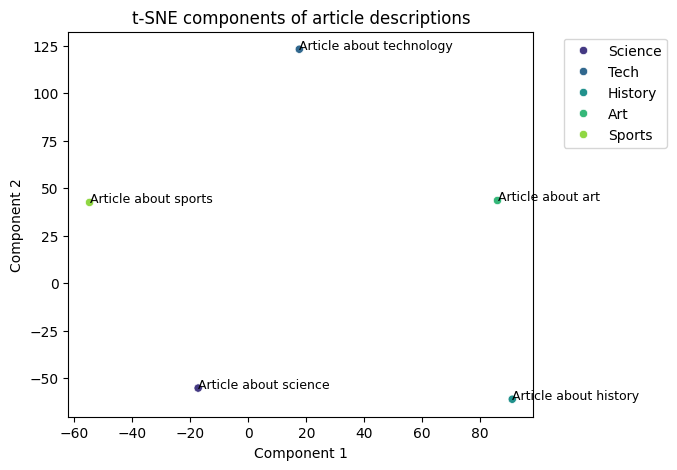

In [44]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

def chart_from_components(components, labels=None, strings=None, width=600, height=500, title="t-SNE components"):
    """
    Create a scatter plot from t-SNE components.

    Parameters:
    - components: A 2D numpy array or list of lists containing the t-SNE components.
    - labels: A list of labels for each point (optional).
    - strings: A list of strings to annotate each point (optional).
    - width: Width of the plot in pixels.
    - height: Height of the plot in pixels.
    - title: Title of the plot.
    """
    # Convert to numpy array if needed
    components = np.array(components)
    
    # Set the size of the plot
    plt.figure(figsize=(width / 100, height / 100))

    # Create the scatter plot
    if labels is not None:
        unique_labels = list(set(labels))
        palette = sns.color_palette("viridis", len(unique_labels))
        sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=labels, palette=palette, legend='full')
    else:
        sns.scatterplot(x=components[:, 0], y=components[:, 1])

    # Annotate points if strings are provided
    if strings is not None:
        for i, string in enumerate(strings):
            plt.text(components[i, 0] + 0.01, components[i, 1], string, fontsize=9)

    # Set plot title and labels
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    
    # Show legend if labels are provided
    if labels is not None:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Show the plot
    plt.show()

# Example usage
# Generate example data
article_descriptions = [
    "Article about science",
    "Article about technology",
    "Article about history",
    "Article about art",
    "Article about sports"
]

# Fake embeddings (for demonstration purposes)
embeddings = np.random.rand(len(article_descriptions), 2048)

# Ensure perplexity is less than the number of samples
n_samples = embeddings.shape[0]
perplexity = min(30, n_samples - 1)

# Compute t-SNE components
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
tsne_components = tsne.fit_transform(embeddings)

# Fake labels (for demonstration purposes)
labels = ["Science", "Tech", "History", "Art", "Sports"]

# Plot the components
chart_from_components(
    components=tsne_components,
    labels=labels,
    strings=article_descriptions,
    width=600,
    height=500,
    title="t-SNE components of article descriptions"
)


### indices_of_nearest_neighbors_from_distances

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

def indices_of_nearest_neighbors_from_distances(query_embedding: np.ndarray, embeddings: np.ndarray, distance_metric='cosine', n_neighbors=5) -> np.ndarray:
    """
    Find the indices of the nearest neighbors based on distances from the query embedding.

    Parameters:
    - query_embedding: A numpy array representing the query embedding.
    - embeddings: A numpy array of shape (n_samples, n_features) representing the embeddings to search.
    - distance_metric: The distance metric to use (default is 'cosine').
    - n_neighbors: The number of nearest neighbors to find (default is 5).

    Returns:
    - A numpy array of indices of the nearest neighbors.
    """
    # Calculate distances between the query embedding and all other embeddings
    distances = cdist([query_embedding], embeddings, metric=distance_metric).flatten()
    # Get the indices of the nearest neighbors
    nearest_indices = np.argsort(distances)[:n_neighbors]
    
    return nearest_indices

# Example usage
query_emb = np.array([0.1, 0.2, 0.3, 0.4])
embeddings = np.array([
    [0.1, 0.2, 0.3, 0.4],
    [0.3, 0.4, 0.5, 0.6],
    [0.4, 0.5, 0.6, 0.7],
])

nearest_indices = indices_of_nearest_neighbors_from_distances(query_emb, embeddings, distance_metric='cosine', n_neighbors=2)
print(nearest_indices)


### load data

In [ ]:
# load data (full dataset available at http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html)
import pandas as pd
dataset_path = "../data/AG_news_samples.csv"
df = pd.read_csv(dataset_path)
n_examples = 5
df.head(n_examples)

In [ ]:
# print the title, description, and label of each example
for idx, row in df.head(n_examples).iterrows():
    print("")
    print(f"Title: {row['title']}")
    print(f"Description: {row['description']}")
    print(f"Label: {row['label']}")

In [ ]:
import pickle

# establish a cache of embeddings to avoid recomputing
# cache is a dict of tuples (text, model) -> embedding, saved as a pickle file

# set path to embedding cache
embedding_cache_path = "../data/recommendations_embeddings_cache.pkl"
EMBEDDING_MODEL = "text-embedding-3-small"

# load the cache if it exists, and save a copy to disk
try:
    embedding_cache = pd.read_pickle(embedding_cache_path)
except FileNotFoundError:
    embedding_cache = {}
with open(embedding_cache_path, "wb") as embedding_cache_file:
    pickle.dump(embedding_cache, embedding_cache_file)

# define a function to retrieve embeddings from the cache if present, and otherwise request via the API
def embedding_from_string(
    string: str,
    model: str = EMBEDDING_MODEL,
    embedding_cache=embedding_cache
) -> list:
    """Return embedding of given string, using a cache to avoid recomputing."""
    if (string, model) not in embedding_cache.keys():
        embedding_cache[(string, model)] = get_embedding(string, model = model)
        with open(embedding_cache_path, "wb") as embedding_cache_file:
            pickle.dump(embedding_cache, embedding_cache_file)
    return embedding_cache[(string, model)]


In [ ]:
# as an example, take the first description from the dataset
example_string = df["description"].values[0]
print(f"\nExample string: {example_string}")

# print the first 10 dimensions of the embedding
example_embedding = embedding_from_string(example_string)
print(f"\nExample embedding: {example_embedding[:10]}...")

In [ ]:
def print_recommendations_from_strings(
    strings: list[str],
    index_of_source_string: int,
    k_nearest_neighbors: int = 1,
    model=EMBEDDING_MODEL,
) -> list[int]:
    """Print out the k nearest neighbors of a given string."""
    # get embeddings for all strings
    embeddings = [embedding_from_string(string, model=model) for string in strings]

    # get the embedding of the source string
    query_embedding = embeddings[index_of_source_string]

    # get distances between the source embedding and other embeddings (function from utils.embeddings_utils.py)
    distances = distances_from_embeddings(query_embedding, embeddings, distance_metric="cosine")
    
    # get indices of nearest neighbors (function from utils.utils.embeddings_utils.py)
    indices_of_nearest_neighbors = indices_of_nearest_neighbors_from_distances(distances)

    # print out source string
    query_string = strings[index_of_source_string]
    print(f"Source string: {query_string}")
    # print out its k nearest neighbors
    k_counter = 0
    for i in indices_of_nearest_neighbors:
        # skip any strings that are identical matches to the starting string
        if query_string == strings[i]:
            continue
        # stop after printing out k articles
        if k_counter >= k_nearest_neighbors:
            break
        k_counter += 1

        # print out the similar strings and their distances
        print(
            f"""
        --- Recommendation #{k_counter} (nearest neighbor {k_counter} of {k_nearest_neighbors}) ---
        String: {strings[i]}
        Distance: {distances[i]:0.3f}"""
        )

    return indices_of_nearest_neighbors


In [ ]:
article_descriptions = df["description"].tolist()

tony_blair_articles = print_recommendations_from_strings(
    strings=article_descriptions,  # let's base similarity off of the article description
    index_of_source_string=0,  # articles similar to the first one about Tony Blair
    k_nearest_neighbors=5,  # 5 most similar articles
)

### visualize embeddings

tsne_components [[-170.34172  -239.14188 ]
 [-321.23053  -197.12492 ]
 [  43.712204   78.05192 ]
 [ -57.00301   193.3614  ]
 [  18.457403 -385.69855 ]]
labels ['Sci/Tech', 'Sports', 'Sports', 'Sci/Tech', 'Business']


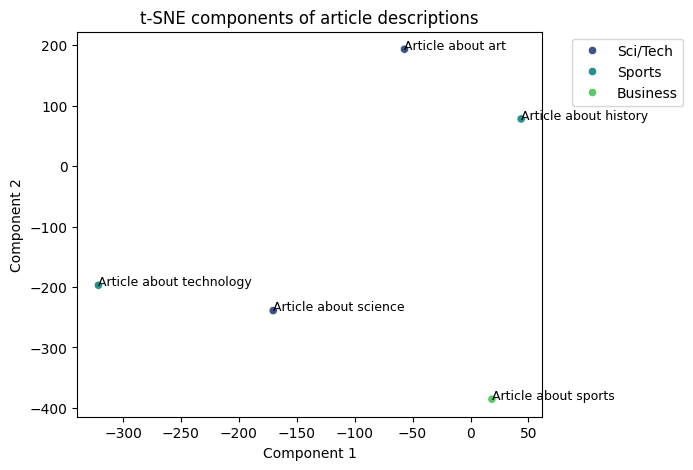

NameError: name 'chipset_security_labels' is not defined

In [69]:
# get embeddings for all article descriptions
embeddings = [embedding_from_string(string) for string in article_descriptions]
# compress the 2048-dimensional embeddings into 2 dimensions using t-SNE
tsne_components = tsne_components_from_embeddings(embeddings, n_components=2, perplexity=2)
# get the article labels for coloring the chart
print("tsne_components", tsne_components)
labels = df["label"].tail(5).tolist()
print("labels", labels)

chart_from_components(
    components=tsne_components,
    labels=labels,
    strings=article_descriptions,
    width=600,
    height=500,
    title="t-SNE components of article descriptions",
)

In [68]:
# create labels for the recommended articles
def nearest_neighbor_labels(
    list_of_indices: list[int],
    k_nearest_neighbors: int = 5
) -> list[str]:
    """Return a list of labels to color the k nearest neighbors."""
    labels = ["Other" for _ in list_of_indices]
    source_index = list_of_indices[0]
    labels[source_index] = "Source"
    for i in range(k_nearest_neighbors):
        nearest_neighbor_index = list_of_indices[i + 1]
        labels[nearest_neighbor_index] = f"Nearest neighbor (top {k_nearest_neighbors})"
    return labels


tony_blair_labels = nearest_neighbor_labels(tony_blair_articles, k_nearest_neighbors=1)
chipset_security_labels = nearest_neighbor_labels(chipset_security_articles, k_nearest_neighbors=1
)

# a 2D chart of nearest neighbors of the Tony Blair article
chart_from_components(
    components=tsne_components,
    labels=tony_blair_labels,
    strings=article_descriptions,
    width=600,
    height=500,
    title="Nearest neighbors of the Tony Blair article",
    category_orders={"label": ["Other", "Nearest neighbor (top 5)", "Source"]},
)


IndexError: list assignment index out of range